In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/train.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [6]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [8]:
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [9]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [10]:
X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [24]:
n_train = X_train['Age'].isnull().sum()

age_samples_train = (
    X_train['Age']
    .dropna()
    .sample(n_train, random_state=42)
    .values
)

In [31]:
n_test = X_test['Age'].isnull().sum()

age_samples_test = (
    X_train['Age']
    .dropna()
    .sample(n_test, random_state=42)
    .values
)

In [26]:
X_train.loc[X_train['Age'].isnull(), 'Age_imputed'] = age_samples_train

In [27]:
age_samples_train

array([22.  , 18.  , 38.  , 40.  , 52.  , 23.  , 32.  , 16.  , 27.  ,
        9.  , 26.  , 45.  , 17.  , 30.  , 26.  , 25.  , 24.  , 30.  ,
       36.  , 24.  , 36.  , 44.  , 45.  , 15.  , 25.  ,  2.  , 38.  ,
       36.  , 25.  , 25.  , 36.  , 24.  , 30.  , 25.  , 20.  , 23.  ,
       24.  , 18.  , 22.  , 26.  , 26.  , 33.  , 28.  , 18.  ,  3.  ,
       27.  , 64.  , 41.  , 36.  , 31.  , 45.  , 29.  , 22.  , 30.  ,
       47.  , 16.  , 27.  , 30.  , 28.  ,  3.  , 41.  , 22.  , 29.  ,
       62.  , 31.  , 40.  , 40.  , 14.  ,  0.75, 34.  ,  5.  , 35.  ,
       30.  , 21.  , 24.  , 21.  , 18.  , 22.  , 40.  , 31.  ,  5.  ,
       22.  , 51.  , 27.  , 37.  , 33.  , 45.  , 17.  , 14.  , 32.  ,
       19.  , 24.  , 19.  , 49.  , 16.  , 25.  , 49.  , 31.  , 22.  ,
       23.  , 26.  , 45.  , 32.  , 20.  ,  4.  , 42.  , 35.  , 31.  ,
        2.  , 30.  , 50.  ,  9.  , 37.  , 35.  , 47.  , 38.  , 40.  ,
       23.5 , 18.  , 20.  , 54.  , 62.  ,  9.  , 27.  , 18.  , 30.  ,
       60.  , 40.  ,

In [32]:
X_train['Age'].isnull().sum()

np.int64(148)

In [33]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,18.0
493,71.0,49.5042,71.0
527,NaN,221.7792,21.0


/var/folders/zg/vww70hbs5c3dpv0511jq60qw0000gn/T/ipykernel_5087/2642582470.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original',hist=False)
/var/folders/zg/vww70hbs5c3dpv0511jq60qw0000gn/T/ipykernel_5087/2642582470.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5

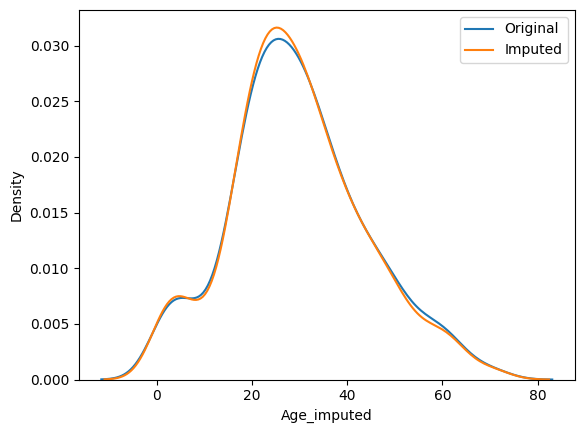

In [34]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [35]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.34951339046142
Variance after random imputation:  200.02896637747122


In [36]:
X_train[['Fare','Age','Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,53.259863
Age,71.512440,204.349513,204.349513
Age_imputed,53.259863,204.349513,200.028966


<Axes: >

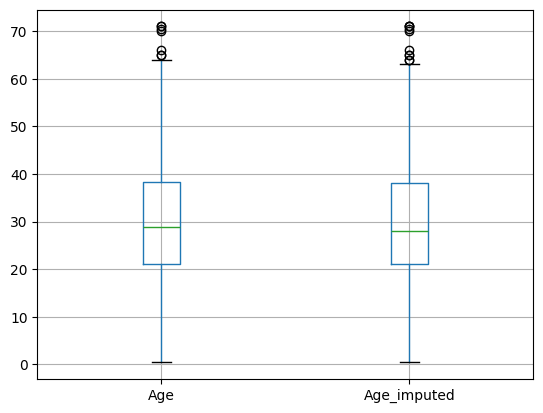

In [37]:
X_train[['Age','Age_imputed']].boxplot()

In [40]:
for _, observation in X_train.iterrows():
    sampled_value = X_train['Age'].dropna().sample(
        1,
        random_state=int(observation['Fare'])
    ).values[0]

In [42]:
data = pd.read_csv('./data/house-train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [43]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [44]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [45]:
X=data
y = data['SalePrice']

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [48]:
X_train['GarageQual_imputed']=X_train['GarageQual']
X_test['GarageQual_imputed']=X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [49]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
458,Gd,TA,161000,TA,Gd
439,NaN,TA,110000,TA,NaN
914,NaN,TA,173733,TA,NaN
92,NaN,TA,163500,TA,NaN
279,TA,TA,192000,TA,TA


In [52]:
n_train = X_train['GarageQual'].isnull().sum()
garage_sample_train = (X_train['GarageQual'].dropna().sample(n_train, random_state=42).values)

n_test = X_test['GarageQual'].isnull().sum()
garage_sample_test = (X_test['GarageQual'].dropna().sample(n_test, random_state=42).values)

n_train = X_train['FireplaceQu'].isnull().sum()
garage_sample_train = (X_train['FireplaceQu'].dropna().sample(n_train, random_state=42).values)

n_test = X_test['FireplaceQu'].isnull().sum()
garage_sample_test = (X_test['FireplaceQu'].dropna().sample(n_test, random_state=42).values)

In [53]:
temp = pd.concat(
    [
        X_train['GarageQual'].value_counts()/len(X_train['GarageQual'].dropna()),
        X_train['GarageQual_imputed'].value_counts()/len(X_train)
    ],
    axis=1
)

temp.columns = ['original','imputed']

In [54]:
temp

,original,imputed
TA,0.951043,0.898116
Fa,0.037171,0.035103
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [55]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.338945
TA,0.412439,0.282828
Fa,0.040917,0.028058
Po,0.027823,0.019080
Ex,0.024550,0.016835


/var/folders/zg/vww70hbs5c3dpv0511jq60qw0000gn/T/ipykernel_5087/1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
/var/folders/zg/vww70hbs5c3dpv0511jq60qw0000gn/T/ipykernel_5087/1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.c

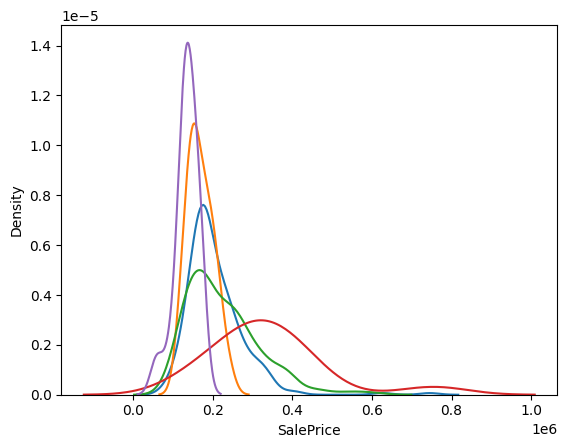

In [56]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

/var/folders/zg/vww70hbs5c3dpv0511jq60qw0000gn/T/ipykernel_5087/722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
/var/folders/zg/vww70hbs5c3dpv0511jq60qw0000gn/T/ipykernel_5087/722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.gi

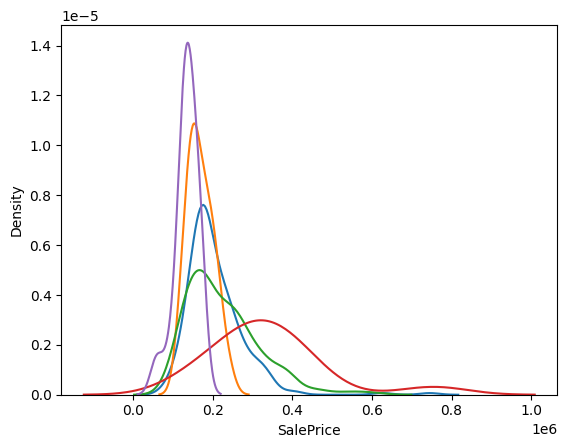

In [57]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()